In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
project_path = '/content/drive/MyDrive/sentiment-analysis-project/'


In [5]:
data_path = project_path + 'data/raw/IMDB_Dataset.csv'


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Optional styling
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
import pandas as pd

# Set path to your dataset
data_path = '/content/drive/MyDrive/sentiment-analysis-project/data/raw/IMDB Dataset.csv.zip'

# Load the CSV file into a DataFrame
df = pd.read_csv(data_path)

# Confirm it loaded
print("✅ Dataset loaded successfully!")


print("📊 Sentiment Analysis Project - Data Exploration")


✅ Dataset loaded successfully!
📊 Sentiment Analysis Project - Data Exploration


In [ ]:
print(f"📈 Dataset Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows of data:")
df.head()


In [12]:
print("❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
review       0
sentiment    0
dtype: int64


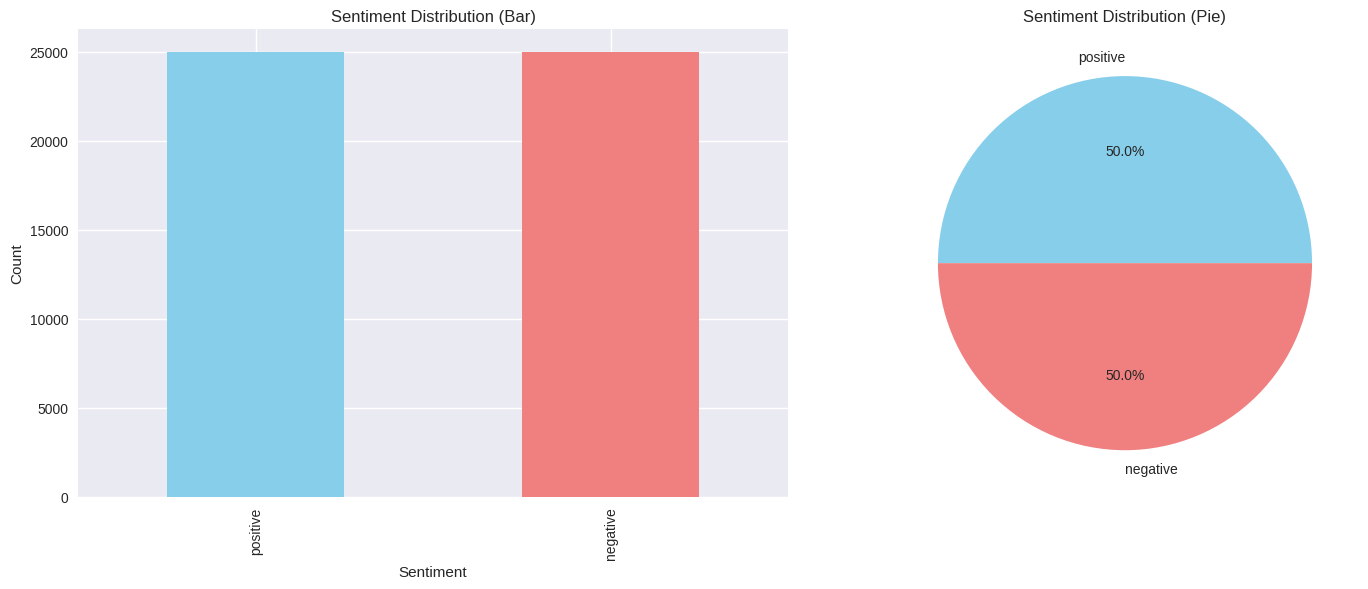

In [13]:
sentiment_counts = df['sentiment'].value_counts()

# Bar and Pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Sentiment Distribution (Bar)')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')

# Pie chart
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['skyblue', 'lightcoral'])
ax2.set_title('Sentiment Distribution (Pie)')

plt.tight_layout()
plt.show()


In [14]:
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

print("📏 Text Length Statistics:")
df[['review_length', 'word_count']].describe()


📏 Text Length Statistics:


,review_length,word_count
count,50000.000000,50000.000000
mean,1309.431020,231.156940
std,989.728014,171.343997
min,32.000000,4.000000
25%,699.000000,126.000000
50%,970.000000,173.000000
75%,1590.250000,280.000000
max,13704.000000,2470.000000


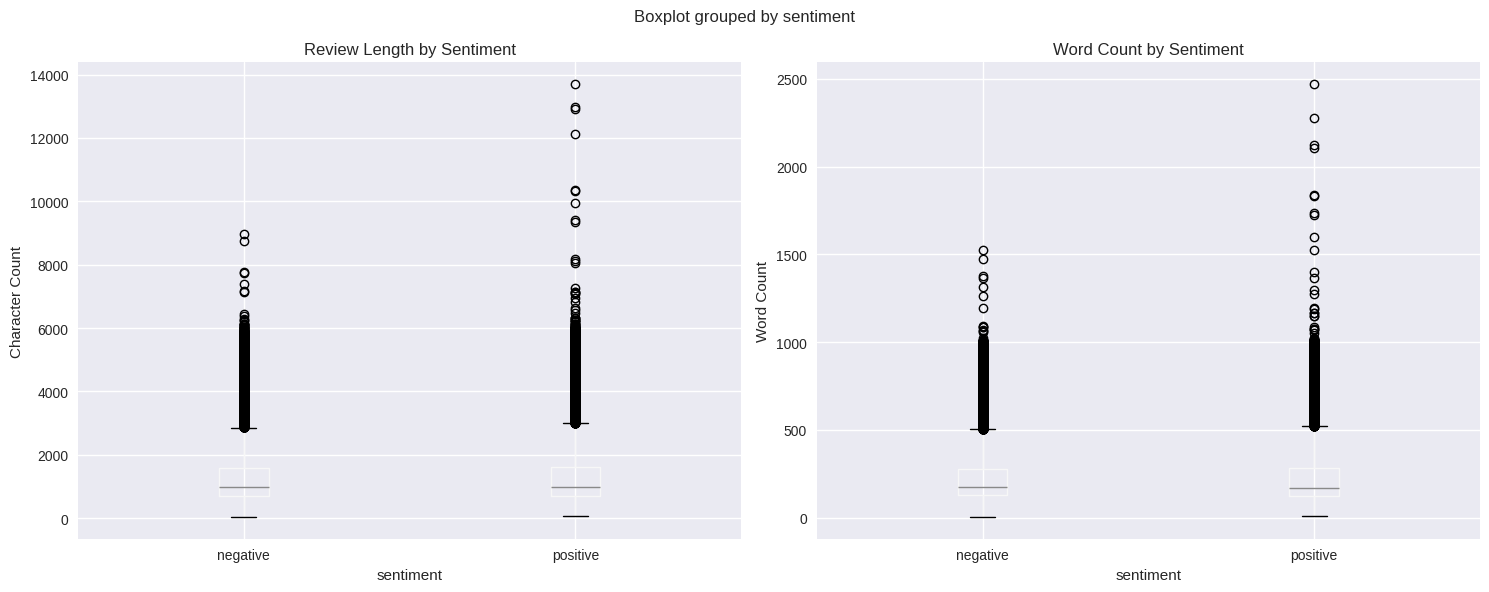

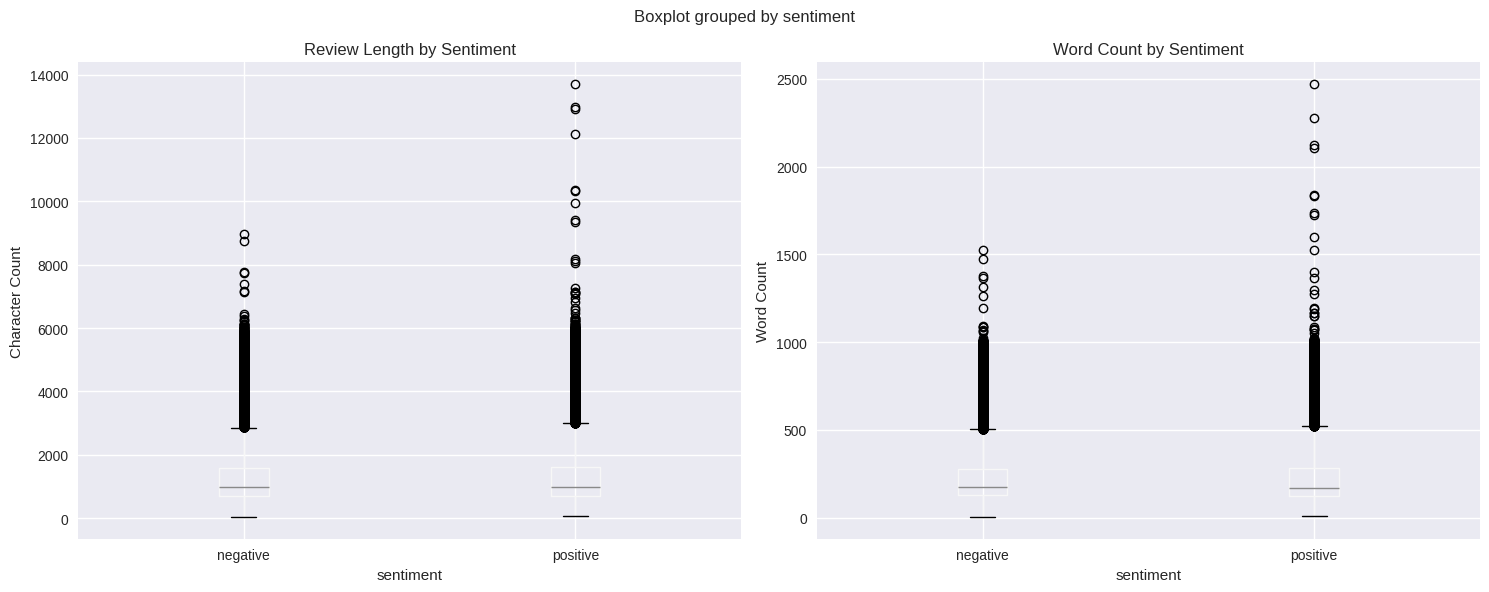

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='review_length', by='sentiment', ax=ax1)
ax1.set_title('Review Length by Sentiment')
ax1.set_ylabel('Character Count')

df.boxplot(column='word_count', by='sentiment', ax=ax2)
ax2.set_title('Word Count by Sentiment')
ax2.set_ylabel('Word Count')

plt.tight_layout()
plt.show()


In [17]:
print("✅ Positive Reviews:")
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...\n")

print("❌ Negative Reviews:")
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...\n")


✅ Positive Reviews:
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...

3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

❌ Negative Reviews:
1. Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...

2. This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but